In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df_train=pd.read_csv('blackfridaytrain.csv')
df_test=pd.read_csv('blackfridaytest.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df=df_train.append(df_test)

C:\Users\sigma\AppData\Local\Temp\ipykernel_2424\3238464827.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.drop('User_ID',axis=1,inplace=True)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [8]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [11]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df_city=pd.get_dummies(df['City_Category'],drop_first=1)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [13]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [14]:
df.drop('City_Category',axis=1,inplace=True)


In [15]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

C:\Users\sigma\AppData\Local\Temp\ipykernel_2424\1147427949.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [20]:
df['Product_Category_2'].mode()[0]

8.0

In [21]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [22]:
df['Product_Category_2'].isnull().sum()

0

In [23]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [24]:
df['Product_Category_2'].mode()[0]

8.0

In [25]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [27]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [28]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

<Axes: xlabel='Age', ylabel='Purchase'>

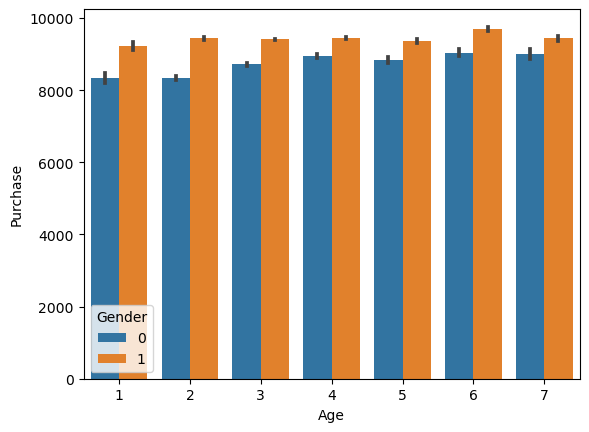

In [33]:
#Visualisation Age vs Purchased
sns.barplot(data=df,x=df['Age'],y=df['Purchase'],hue=df['Gender'])

<Axes: xlabel='Occupation', ylabel='Purchase'>

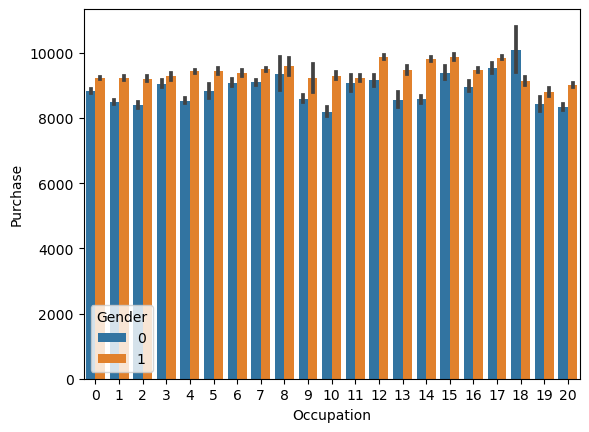

In [34]:
#Visualisation Occupation vs Purchased 
sns.barplot(data=df,x=df['Occupation'],y=df['Purchase'],hue=df['Gender'])

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

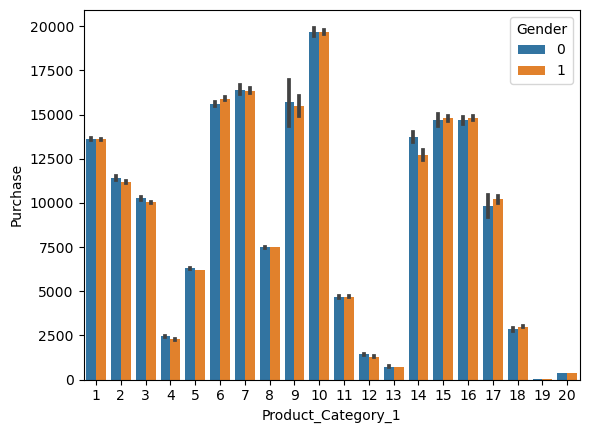

In [35]:
#Visualisation Product_Category_1 vs Purchased 
sns.barplot(data=df,x=df['Product_Category_1'],y=df['Purchase'],hue=df['Gender'])

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

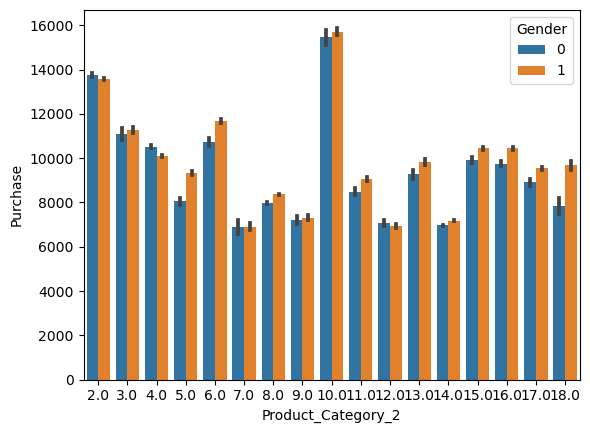

In [36]:
#Visualisation Product_Category_2 vs Purchased 
sns.barplot(data=df,x=df['Product_Category_2'],y=df['Purchase'],hue=df['Gender'])

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

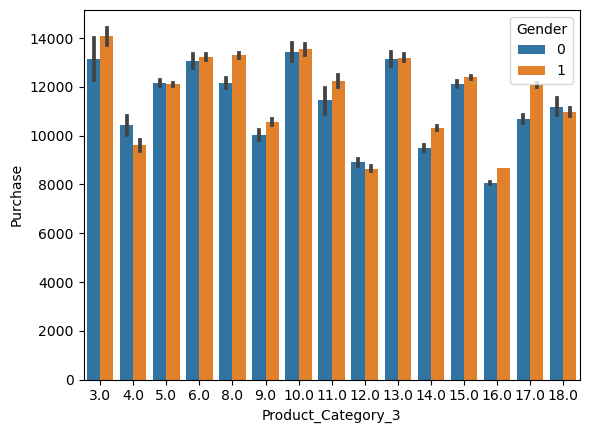

In [37]:
#Visualisation Product_Category_3 vs Purchased 
sns.barplot(data=df,x=df['Product_Category_3'],y=df['Purchase'],hue=df['Gender'])

## Feature Scaling

In [38]:
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]
X=df_train.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [40]:
y=df_train['Purchase']
y.shape

(550068,)

In [41]:
X.shape

(550068, 11)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [44]:
#feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#train the model